## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha

## Carga de librerías

In [4]:
import pandas as pd
import seaborn as sns
# import sklearn as sk
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Visualización de datos

In [6]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [7]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [8]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


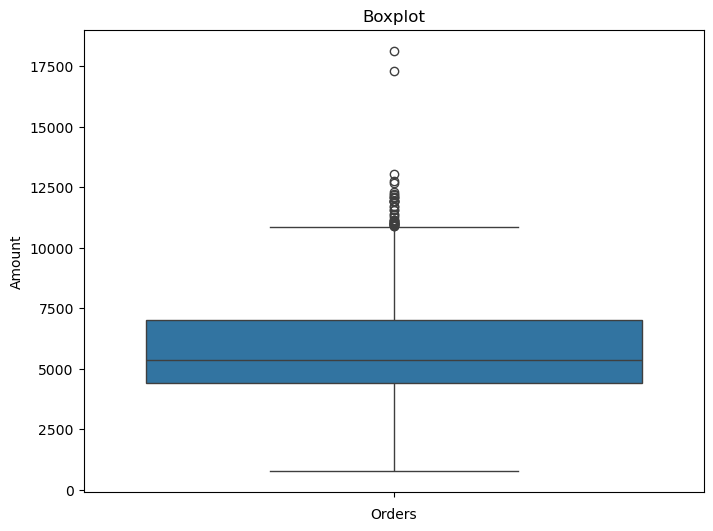

In [10]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [9]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [11]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [12]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [14]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [ ]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [13]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

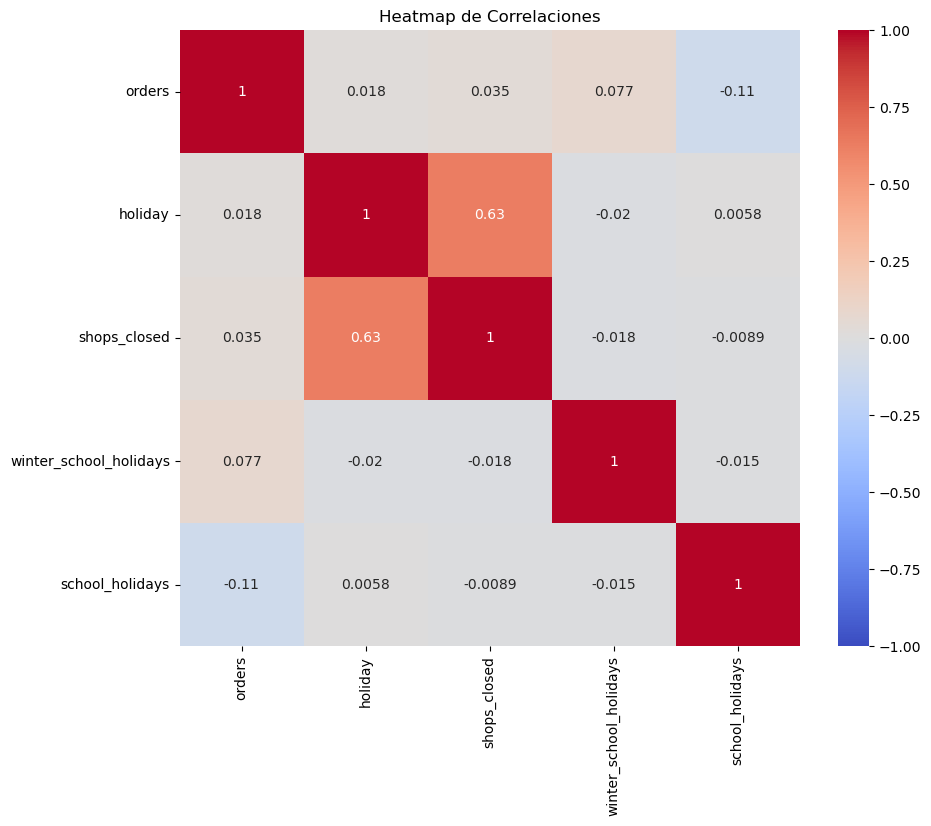

In [15]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'id', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [ ]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

In [17]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

NameError: name 'df_holiday' is not defined

<Figure size 800x600 with 0 Axes>

In [16]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

NameError: name 'df_no_holiday' is not defined

<Figure size 800x600 with 0 Axes>

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [ ]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', 'id', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_34332/853051175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_34332/853051175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [ ]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

KeyError: "['warehouse'] not found in axis"

In [ ]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

ValueError: could not convert string to float: 'Prague_1'

<Figure size 1000x800 with 0 Axes>

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [ ]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [ ]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [ ]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

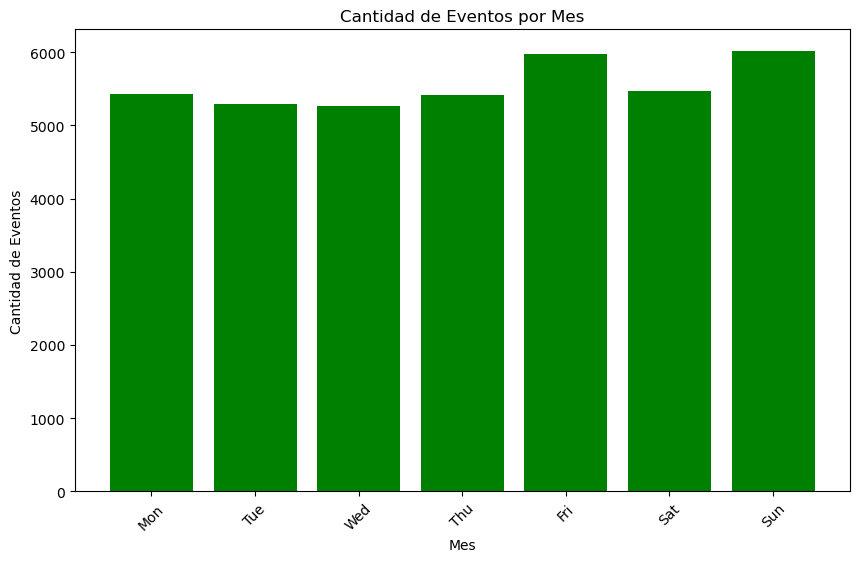

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

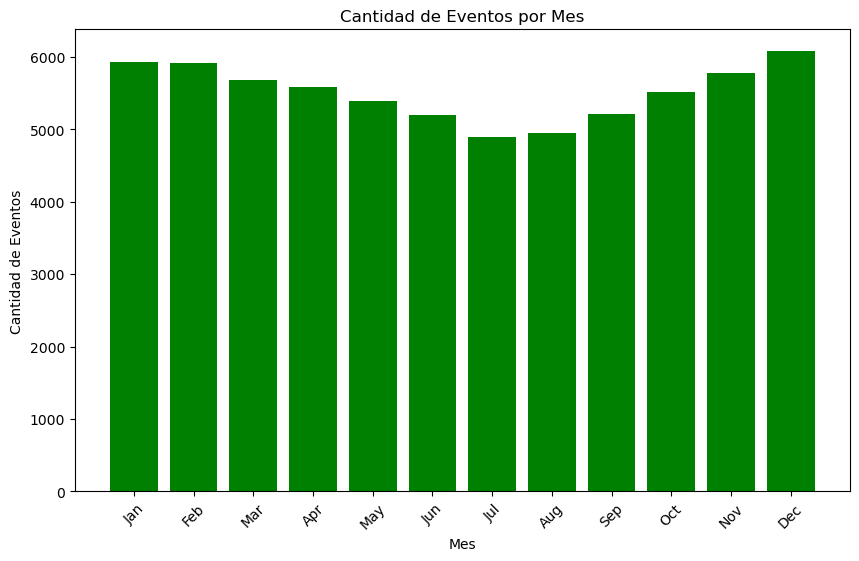

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_clean['fecha'] = pd.to_datetime(df['date'])

In [ ]:
df_clean["Season"] = df_clean.fecha.dt.month_name()

AttributeError: 'DataFrame' object has no attribute 'fecha'

In [ ]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [ ]:
df_clean['Season'] = df_clean.Season.apply(get_season)

In [ ]:
df_seasons_info = pd.concat([df_clean['orders'], pd.get_dummies(df_clean.Season).astype('int').add_prefix('Season_')], axis=1)

In [ ]:
df_seasons_info

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


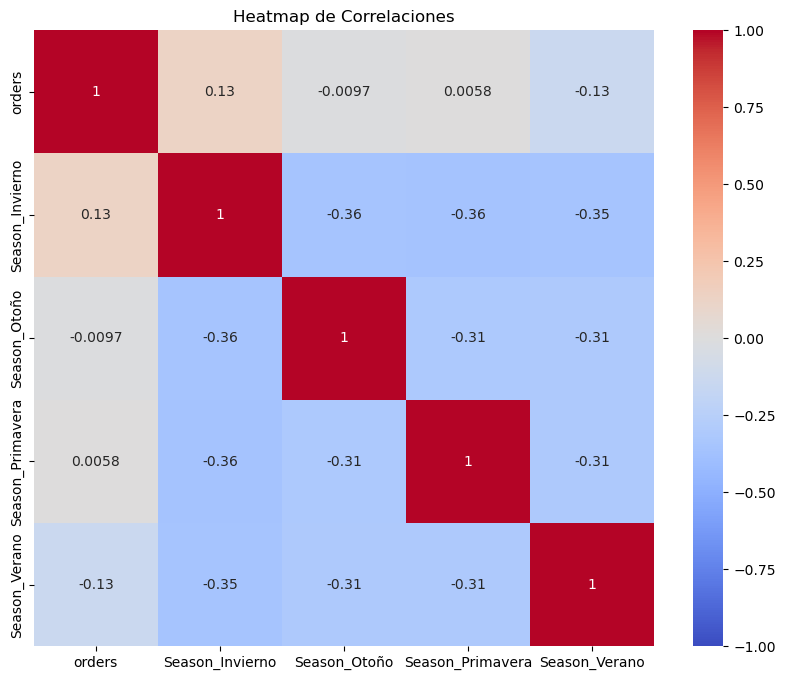

In [ ]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons_info.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [ ]:
df_clean['Hot'] = df_clean.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [ ]:
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13,2024-03-13,Primavera,0


In [ ]:
df_clean.orders.corr(df_clean.Hot)

-0.13284735461473357

In [ ]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [ ]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [85]:
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [86]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'holiday_name', 'holiday', 'winter_school_holidays', 'shops_closed', 'id'], axis = 1)

In [87]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [88]:
df_final = df_final.sort_values(by = "date")

In [89]:
split_index = int(0.8 * len(df))

# Separando el DataFrame en 80% y 20%
df_final_train = df_final.iloc[:split_index]
df_final_validation = df_final.iloc[split_index:]
df_final_train_label = df_final_train.orders
df_final_train = df_final_train.drop(["orders"], axis = 1)
df_final_validation_label = df_final_validation.orders
df_final_validation = df_final_validation.drop(["orders"], axis = 1)

In [90]:
df_final_train

,warehouse,date,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,0,1722.0,32575.0
2386,Prague_2,2020-12-05,0,1317.0,18462.0
3579,Prague_3,2020-12-05,0,964.0,17693.0
6186,Budapest_1,2020-12-05,0,3046.0,17840.0
1193,Brno_1,2020-12-05,0,2332.0,27392.0
...,...,...,...,...,...
971,Prague_1,2023-08-06,0,1657.0,36209.0
7124,Budapest_1,2023-08-06,0,2962.0,22432.0
3357,Prague_2,2023-08-06,0,1287.0,21491.0
4551,Prague_3,2023-08-07,0,950.0,19482.0


In [91]:
# user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
PROMEDIO_UA1 = df_usact1.mean()
means_ua1= df_usact1.to_dict()

In [92]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

In [93]:
df_final_train["user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_train["user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)
df_final_train = df_final_train.drop(['date'], axis = 1)
df_final = df_final_train.reset_index().drop(["index"], axis = 1)

In [94]:
df_final_validation["user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_validation["user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)
df_final_validation = df_final_validation.drop(['date'], axis = 1)
df_final = df_final_validation.reset_index().drop(["index"], axis = 1)

In [95]:
df_final_train

,school_holidays,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season
0,0,1673.672840,35952.602881,0,0,0,0,1,0
2386,0,1303.776749,20996.281893,0,0,0,0,0,0
3579,0,956.427544,18871.905447,0,0,0,0,0,0
6186,0,2989.895634,21435.602769,0,1,0,0,0,0
1193,0,2324.431070,29416.394033,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
971,0,1673.672840,35952.602881,0,0,0,0,1,1
7124,0,2989.895634,21435.602769,0,1,0,0,0,1
3357,0,1303.776749,20996.281893,0,0,0,0,0,1
4551,0,956.427544,18871.905447,0,0,0,0,0,1


In [96]:
df_final_validation["warehouse_Budapest_1"] = 0

In [100]:
# Definir el orden de las columnas deseado
column_order = ['school_holidays', 'user_activity_1', 'user_activity_2', 'warehouse_Brno_1', 'warehouse_Budapest_1', 'warehouse_Frankfurt_1', 'warehouse_Munich_1', 'warehouse_Prague_1', 'hot_season']


In [101]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_validation = df_final_validation[column_order]
df_final_train = df_final_train[column_order]


In [98]:
df_final_validation

,school_holidays,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,warehouse_Budapest_1
3358,0,1303.776749,20996.281893,0,0,0,0,1,0
2165,0,2324.431070,29416.394033,1,0,0,0,1,0
5999,0,852.771493,5812.461538,0,1,0,0,1,0
972,0,1673.672840,35952.602881,0,0,0,1,1,0
7125,0,2989.895634,21435.602769,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2385,0,2324.431070,29416.394033,1,0,0,0,1,0
4771,0,956.427544,18871.905447,0,0,0,0,1,0
1192,0,1673.672840,35952.602881,0,0,0,1,1,0
3578,0,1303.776749,20996.281893,0,0,0,0,1,0


## XGboost

In [120]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [131]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80 , 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}



In [132]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(df_final_train, df_final_train_label)



Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [124]:
df_final_validation

,school_holidays,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season
3358,0,1303.776749,20996.281893,0,0,0,0,0,1
2165,0,2324.431070,29416.394033,1,0,0,0,0,1
5999,0,852.771493,5812.461538,0,0,1,0,0,1
972,0,1673.672840,35952.602881,0,0,0,0,1,1
7125,0,2989.895634,21435.602769,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2385,0,2324.431070,29416.394033,1,0,0,0,0,1
4771,0,956.427544,18871.905447,0,0,0,0,0,1
1192,0,1673.672840,35952.602881,0,0,0,0,1,1
3578,0,1303.776749,20996.281893,0,0,0,0,0,1


In [125]:
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(df_final_validation)

Mejor combinación de hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}


In [133]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(df_final_validation)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
Mean Squared Error: 2262521.45


In [134]:
list(y_pred)

[4901.7314,
 6796.746,
 1598.7308,
 7911.2856,
 5293.498,
 6796.746,
 1598.7308,
 7911.2856,
 4901.7314,
 5293.498,
 3158.4055,
 4527.3237,
 7911.2856,
 4527.3237,
 3158.4055,
 6796.746,
 5293.498,
 4901.7314,
 1598.7308,
 3158.4055,
 5293.498,
 7911.2856,
 4527.3237,
 6796.746,
 1598.7308,
 4901.7314,
 4527.3237,
 3158.4055,
 1598.7308,
 7911.2856,
 5293.498,
 4901.7314,
 6796.746,
 6796.746,
 4901.7314,
 4527.3237,
 7911.2856,
 1598.7308,
 3158.4055,
 5293.498,
 7911.2856,
 5293.498,
 6796.746,
 4527.3237,
 4901.7314,
 1598.7308,
 7911.2856,
 3158.4055,
 4901.7314,
 5293.498,
 4527.3237,
 6796.746,
 1598.7308,
 4527.3237,
 4901.7314,
 7911.2856,
 6796.746,
 5293.498,
 3158.4055,
 1598.7308,
 4527.3237,
 6796.746,
 7911.2856,
 4901.7314,
 5293.498,
 6796.746,
 3158.4055,
 5293.498,
 4527.3237,
 4901.7314,
 1598.7308,
 7911.2856,
 6796.746,
 3158.4055,
 5293.498,
 4527.3237,
 7911.2856,
 1598.7308,
 4901.7314,
 4527.3237,
 6796.746,
 3158.4055,
 5293.498,
 7911.2856,
 1598.7308,
 4901.

In [ ]:
df_final_validation_label

3358     5020.0
2165     7319.0
5999     1565.0
972      8455.0
7125     5607.0
         ...   
2385    10777.0
4771     6408.0
1192    11917.0
3578     7140.0
6185     1916.0
Name: orders, Length: 1468, dtype: float64